# Modelo para Precificação de Salários para Profissionais de Dados

O **objetivo** deste projeto e fazer predições precisas sobre o salario a ser pago a um profissional da area de dados com base nos salarios conhecidos para que a empresa possa oferecer remuneração competitiva a funcionarios existentes e futuros.

---

## Analise exploratoria 
Como base de dados iremos utilizar a pesquisa feita pelo pessoal do Data Hackers em 2021 a nivel nacional, entrevistando 2645 profissionais que responderam sobre diversas variáveis de suas carreirais, desde salário e tempo de experiência até plataformas de ensino e conceitos mais utilizados.




In [3]:
import pandas as pd
pd.set_option("display.max_columns", 400)
link = 'https://raw.githubusercontent.com/DionesGouvea/Salary-Prediction/main/Datasets/State%20of%20Data%202021%20-%20Dataset%20-%20Pgina1.csv'
dados = pd.read_csv(link)
dados

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,"('P0', 'id')","('P1_a ', 'Idade')","('P1_a_a ', 'Faixa idade')","('P1_b ', 'Genero')","('P1_e ', 'Estado onde mora')","('P1_e_a ', 'uf onde mora')","('P1_e_b ', 'Regiao onde mora')","('P1_g_b ', 'Regiao de origem')","('P1_g_c ', 'Mudou de Estado?')","('P1_h ', 'Nivel de Ensino')","('P1_i ', 'Área de Formação')","('P2_a ', 'Qual sua situação atual de trabalho?')","('P2_b ', 'Setor')","('P2_c ', 'Numero de Funcionarios')","('P2_d ', 'Gestor?')","('P2_e ', 'Cargo como Gestor')","('P2_f ', 'Cargo Atual')","('P2_g ', 'Nivel')","('P2_h ', 'Faixa salarial')","('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')","('P2_j ', 'Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?')","('P2_k ', 'Você está satisfeito na sua empresa atual?')","('P2_l ', 'Qual o principal motivo da sua insatisfação com a empresa atual?')","('P2_l_a ', 'Falta de oportunidade de crescimento no emprego atual')","('P2_l_b ', 'Salário atual não corresponde ao mercado')","('P2_l_c ', 'Não tenho uma boa relação com meu líder/gestor')","('P2_l_d ', 'Gostaria de trabalhar em em outra área de atuação')","('P2_l_e ', 'Gostaria de receber mais benefícios')","('P2_l_f ', 'O clima de trabalho/ambiente não é bom')","('P2_l_g ', 'Falta de maturidade analítica na empresa')","('P2_m ', 'Você participou de entrevistas de emprego nos últimos 6 meses?')","('P2_n ', 'Você pretende mudar de emprego nos próximos 6 meses?')","('P2_o ', 'Quais os principais critérios que você leva em consideração no momento de decidir onde trabalhar?')","('P2_o_a ', 'Remuneração/Salário')","('P2_o_b ', 'Benefícios')","('P2_o_c ', 'Propósito do trabalho e da empresa')","('P2_o_d ', 'Flexibilidade de trabalho remoto')","('P2_o_e ', 'Ambiente e clima de trabalho')","('P2_o_f ', 'Oportunidade de aprendizado e trabalhar com referências na área')","('P2_o_g ', 'Plano de carreira e oportunidades de crescimento profissional')","('P2_o_h ', 'Maturidade da empresa em termos de tecnologia e dados')","('P2_o_i ', 'Qualidade dos gestores e líderes')","('P2_o_j ', 'Reputação que a empresa tem no mercado')","('P2_q ', 'Atualmente qual a sua forma de trabalho?')","('P2_r ', 'Qual a forma de trabalho ideal para você?')","('P2_s ', 'Caso sua empresa decida pelo modelo 100% presencial qual será sua atitude?')","('P3_a ', 'Qual o número aproximado de pessoas que atuam com dados na sua empresa hoje?')","('P3_b ', 'Quais desses papéis/cargos fazem parte do time (ou chapter) de dados da sua empresa?')","('P3_b_a ', 'Analytics Engineer')","('P3_b_b ', 'Engenharia de Dados/Data Engineer')","('P3_b_c ', 'Analista de Dados/Data Analyst')","('P3_b_d ', 'Cientista de Dados/Data Scientist')","('P3_b_e ', 'Database Administrator/DBA')","('P3_b_f ', 'Analista de Business Intelligence/BI')","('P3_b_g ', 'Arquiteto de Dados/Data Architect')","('P3_b_h ', 'Data Product Manager/DPM')","('P3_b_i ', 'Business Analyst')","('P3_c ', 'Quais dessas responsabilidades fazem parte da sua rotina atual de trabalho como gestor?')","('P3_c_a ', 'Pensar na visão de longo prazo de dados da empresa e fortalecimento da cultura analítica da companhia.')","('P3_c_b ', 'Organização de treinamentos e iniciativas com o objetivo de aumentar a maturidade analítica das áreas de negócios.')","('P3_c_c ', 'Atração, seleção e contratação de talentos para o time de dados.')","('P3_c_d ', 'Decisão sobre contratação de ferramentas e tecnologias relacionadas a dados.')","('P3_c_e ', 'Sou gestor da equipe responsável pela engenharia de dados e por manter o Data Lake da empresa como fonte única dos dados, garantindo a qualidade e confiabilidade da informação.')","('P3_c_f ', 'Sou gestor da equipe responsável pela entrega de dados, estudos, relatórios e dashboards para as áreas de negócio da empresa.')","('P3_c_g ', 'Sou gestor da equipe responsável por iniciativas e projetos envolvendo Inteligência Artificial e Machine Learning.')","('P3_c_h ', 'Apesar de ser gestor ainda atuo na part

In [4]:
# Pegando os nomes das colunas para visualizar as mais relevantes
#column_headers = list(dados.columns)
#print("The Column Header :", column_headers)

In [5]:
dados["('P1_e ', 'Estado onde mora')"].value_counts()

São Paulo (SP)              1076
Minas Gerais (MG)            341
Rio de Janeiro (RJ)          222
Paraná (PR)                  149
Rio Grande do Sul (RS)       136
Santa Catarina (SC)          115
Distrito Federal (DF)         96
Ceará (CE)                    68
Pernambuco (PE)               58
Bahia (BA)                    58
Goiás (GO)                    57
Fora do Brasil                53
Paraíba (PB)                  39
Espírito Santo (ES)           32
Rio Grande do Norte (RN)      22
Sergipe (SE)                  20
Mato Grosso (MT)              19
Alagoas (AL)                  14
Piauí (PI)                    13
Mato Grosso do Sul (MS)       12
Maranhão (MA)                  9
Name: ('P1_e ', 'Estado onde mora'), dtype: int64

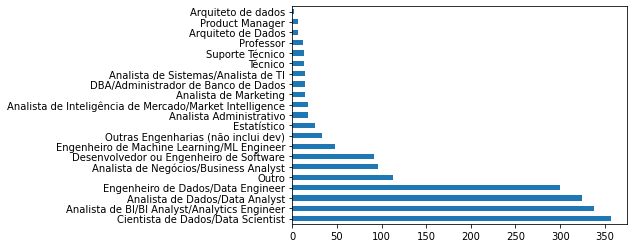

In [6]:
dados["('P2_f ', 'Cargo Atual')"].value_counts().plot(kind = 'barh')

In [7]:
#verificando a faixa de idade 
dados["('P1_a_a ', 'Faixa idade')"].value_counts()

25-29    833
30-34    635
35-39    377
22-24    310
40-44    195
17-21    117
45-49     92
50-54     58
55+       28
Name: ('P1_a_a ', 'Faixa idade'), dtype: int64

In [8]:
#verificando a % de nivel de ensino dos entrevistados
n = dados.shape[0]
(dados["('P1_h ', 'Nivel de Ensino')"].value_counts()/n).round(2)

Graduação/Bacharelado         0.34
Pós-graduação                 0.31
Estudante de Graduação        0.15
Mestrado                      0.13
Doutorado ou Phd              0.04
Não tenho graduação formal    0.02
Prefiro não informar          0.00
Name: ('P1_h ', 'Nivel de Ensino'), dtype: float64

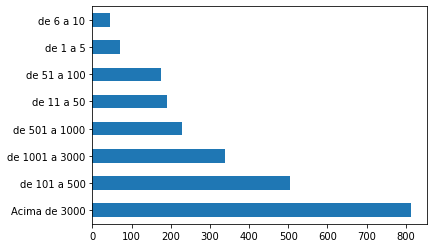

In [9]:
dados["('P2_c ', 'Numero de Funcionarios')"].value_counts().plot(kind = 'barh')

In [10]:
dados["('P2_h ', 'Faixa salarial')"].value_counts()

de R$ 8.001/mês a R$ 12.000/mês     479
de R$ 4.001/mês a R$ 6.000/mês      403
de R$ 6.001/mês a R$ 8.000/mês      393
de R$ 12.001/mês a R$ 16.000/mês    263
de R$ 3.001/mês a R$ 4.000/mês      183
de R$ 2.001/mês a R$ 3000/mês       180
de R$ 16.001/mês a R$ 20.000/mês    129
de R$ 1.001/mês a R$ 2.000/mês      126
de R$ 20.001/mês a R$ 25.000/mês     62
de R$ 25.001/mês a R$ 30.000/mês     43
de R$ 30.001/mês a R$ 40.000/mês     38
Acima de R$ 40.001/mês               34
Menos de R$ 1.000/mês                32
Name: ('P2_h ', 'Faixa salarial'), dtype: int64

In [11]:
dados["('P2_d ', 'Gestor?')"].value_counts()

0.0    1857
1.0     508
Name: ('P2_d ', 'Gestor?'), dtype: int64

In [12]:
#verificando a % das linguagens mais utilizadas pelos entrevistados
n = dados.shape[0]
(dados["('P4_e ', 'Entre as linguagens listadas abaixo, qual é a que você mais utiliza no trabalho?')"].value_counts()/n).round(2)

Python                                         0.28
SQL                                            0.28
Não utilizo nenhuma das linguagens listadas    0.06
R                                              0.03
Visual Basic/VBA                               0.02
JavaScript                                     0.01
Scala                                          0.01
SAS/Stata                                      0.01
C/C++/C#                                       0.00
Java                                           0.00
PHP                                            0.00
.NET                                           0.00
Matlab                                         0.00
Name: ('P4_e ', 'Entre as linguagens listadas abaixo, qual é a que você mais utiliza no trabalho?'), dtype: float64

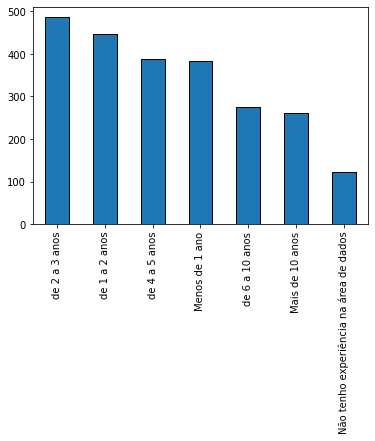

In [13]:
dados["('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')"].value_counts().plot(kind ='bar', edgecolor = 'black')

In [14]:
dados["('P2_b ', 'Setor')"].value_counts()

Tecnologia/Fábrica de Software    641
Finanças ou Bancos                388
Varejo                            141
Indústria                         133
Educação                          129
Área da Saúde                     128
Outro                             122
Internet/Ecommerce                108
Setor Público                     101
Marketing                          80
Telecomunicação                    68
Agronegócios                       48
Consultoria                        47
Setor Alimentício                  46
Setor Automotivo                   33
Entretenimento ou Esportes         28
Seguros ou Previdência             27
Energia                            24
Imobiliário                        23
Construção Civil                   18
Serviços                           17
Logística                          10
consultoria                         5
Name: ('P2_b ', 'Setor'), dtype: int64

In [15]:
n=dados["('P2_q ', 'Atualmente qual a sua forma de trabalho?')"].shape[0]
(dados["('P2_q ', 'Atualmente qual a sua forma de trabalho?')"].value_counts()/n).round(2)

Modelo 100% remoto                                                                                                0.50
Modelo híbrido flexível (o funcionário tem liberdade para escolher quando estar no escritório presencialmente)    0.17
Modelo 100% presencial                                                                                            0.12
Modelo híbrido com dias fixos de trabalho presencial                                                              0.09
Name: ('P2_q ', 'Atualmente qual a sua forma de trabalho?'), dtype: float64

In [16]:
# Pre processamento basico 
#criando variaveis mais convenientes 

#salario 
salamap = {    'Menos de R$ 1.000/mês': 1000,
      'de R$ 1.001/mês a R$ 2.000/mês': 1500, 
       'de R$ 2.001/mês a R$ 3000/mês': 2500,
      'de R$ 3.001/mês a R$ 4.000/mês': 3500,
      'de R$ 4.001/mês a R$ 6.000/mês': 5000, 
      'de R$ 6.001/mês a R$ 8.000/mês': 7000,
     'de R$ 8.001/mês a R$ 12.000/mês': 10000,
    'de R$ 12.001/mês a R$ 16.000/mês': 14000,
    'de R$ 16.001/mês a R$ 20.000/mês': 18000,
    'de R$ 20.001/mês a R$ 25.000/mês': 22500,
    'de R$ 25.001/mês a R$ 30.000/mês': 27500,
    'de R$ 30.001/mês a R$ 40.000/mês': 35000,
              'Acima de R$ 40.001/mês': 40000}
#empresa
tammap = { 'de 1 a 5': 'Pequena',
           'de 6 a 10': 'Pequena',
           'de 11 a 50': 'Pequena',
           'de 51 a 100': 'Pequena',
           'de 101 a 500': 'Média',
           'de 501 a 1000': 'Média',
           'de 1001 a 3000': 'Grande',
           'Acima de 3000': 'Grande'}

dados0 = pd.DataFrame()

dados0['Salário'] = dados["('P2_h ', 'Faixa salarial')"].map(salamap) 
dados0['Genero'] = dados["('P1_b ', 'Genero')"]
dados0['Profissão'] = dados["('P2_f ', 'Cargo Atual')"]
dados0['Experiencia'] = dados["('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')"]
dados0['Cargo de Gestão'] = dados["('P2_d ', 'Gestor?')"].map({0: 'não', 1: 'sim'})
dados0['Escolaridade'] = dados["('P1_h ', 'Nivel de Ensino')"]
dados0['Tamanho da Empresa'] = dados["('P2_c ', 'Numero de Funcionarios')"].map(tammap)
dados0['Estado'] = dados["('P1_e ', 'Estado onde mora')"]
dados0['setor'] = dados["('P2_b ', 'Setor')"]
dados0['Linguagem Python'] = dados["('P4_e_c ', 'Python')"]
dados0['Linguagem R'] = dados["('P4_e_b ', 'R ')"]
dados0['Linguagem SQL'] = dados["('P4_e_a ', 'SQL')"]





In [17]:
#descobrindo a media de salario dos entrevistados
round(dados0['Salário'].mean(), 2)

9361.1

In [18]:
dados0['Genero'].value_counts()

Masculino    2144
Feminino      493
Outro           8
Name: Genero, dtype: int64

In [19]:
dados0.groupby(['Genero', 'Tamanho da Empresa']).count()['Salário'].unstack().T

Genero,Feminino,Masculino,Outro
Tamanho da Empresa,,,
Grande,217,933,2
Média,135,598,1
Pequena,84,393,2


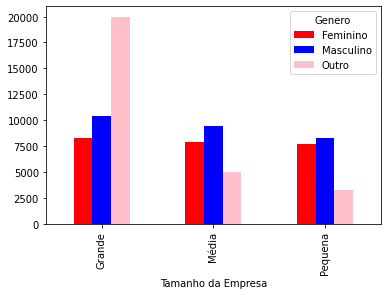

In [20]:
#visualizando a media de salario por genero e tamanho da empresa 
dados0.groupby(['Genero', 'Tamanho da Empresa']).mean()['Salário'].unstack().T.plot(kind = 'bar', color = ['red', 'blue', 'pink'])
                                                                              

In [21]:
#verificando a media de salario por profissão 
dados0.groupby('Profissão').mean()['Salário'].round(2).sort_values(ascending = False)

Profissão
Arquiteto de Dados                                         21285.71
Product Manager                                            12750.00
Arquiteto de dados                                         12000.00
Engenheiro de Dados/Data Engineer                          10120.00
Engenheiro de Machine Learning/ML Engineer                 10041.67
Estatístico                                                 9780.00
Cientista de Dados/Data Scientist                           9067.23
Desenvolvedor ou Engenheiro de Software                     8336.96
Analista de Negócios/Business Analyst                       7067.71
Analista de Inteligência de Mercado/Market Intelligence     6833.33
DBA/Administrador de Banco de Dados                         6821.43
Outro                                                       6792.04
Analista de Dados/Data Analyst                              6779.32
Outras Engenharias (não inclui dev)                         6712.12
Professor                             

In [22]:
#verificando a diferença de salario conforme experiencia profissional
dados0.groupby(['Profissão', 'Experiencia']).mean()['Salário'].round(2).unstack()

Experiencia,Mais de 10 anos,Menos de 1 ano,Não tenho experiência na área de dados,de 1 a 2 anos,de 2 a 3 anos,de 4 a 5 anos,de 6 a 10 anos
Profissão,,,,,,,
Analista Administrativo,2500.00,1833.33,2916.67,2875.00,NaN,2500.00,5333.33
Analista de BI/BI Analyst/Analytics Engineer,12386.36,3333.33,1500.00,4367.09,6581.40,8327.27,8562.50
Analista de Dados/Data Analyst,10236.84,3974.03,5500.00,5840.58,7500.00,8638.30,8878.38
Analista de Inteligência de Mercado/Market Intelligence,14500.00,2928.57,NaN,3500.00,7333.33,10000.00,10000.00
Analista de Marketing,NaN,2000.00,5000.00,4000.00,4166.67,5000.00,10000.00
Analista de Negócios/Business Analyst,13227.27,4842.11,8200.00,4500.00,8733.33,7090.91,8687.50
Analista de Sistemas/Analista de TI,NaN,2500.00,4250.00,4500.00,10000.00,NaN,10000.00
Arquiteto de Dados,16000.00,NaN,NaN,10000.00,18000.00,NaN,29666.67
Arquiteto de dados,NaN,NaN,NaN,NaN,14000.00,NaN,10000.00


# Pre processamento 

xx xx xx xx x xxx

In [23]:
dados0.isnull().mean()

Salário               0.105860
Genero                0.000000
Profissão             0.297921
Experiencia           0.105860
Cargo de Gestão       0.105860
Escolaridade          0.000000
Tamanho da Empresa    0.105860
Estado                0.013611
setor                 0.105860
Linguagem Python      0.297921
Linguagem R           0.297921
Linguagem SQL         0.297921
dtype: float64

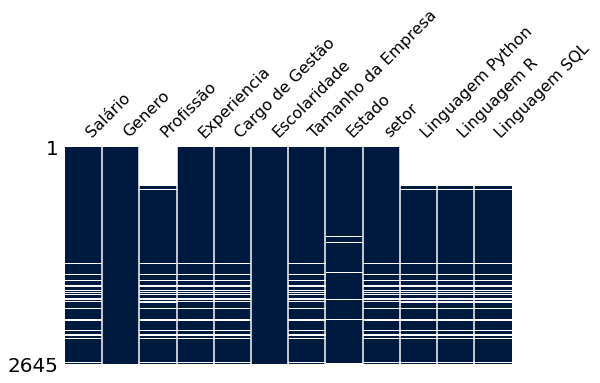

In [24]:
import missingno as msno
import matplotlib as plt

msno.matrix(dados0, figsize = (8, 4), color = (0, 0.1, 0.25), sparkline = False)

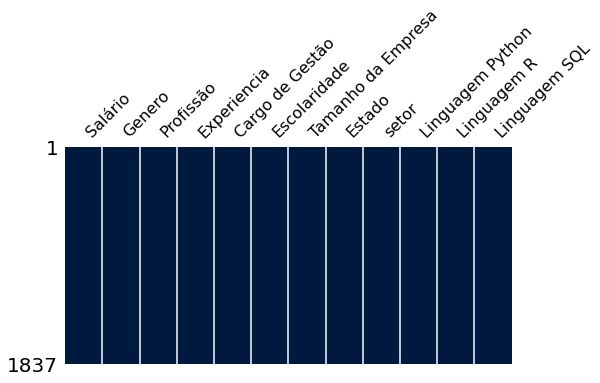

In [25]:
dados0 = dados0.dropna()
msno.matrix(dados0, figsize = (8, 4), color = (0, 0.1, 0.25), sparkline = False)